# Pyladies meetup <img src="https://raw.githubusercontent.com/pyladies/pyladies-assets/master/geek/png/pylady_geek_partial.png" style="display:inline" width="150"  align="right">
# 3. házi feladat megoldása 

## A rejtvényt egy rejtveny.txt file tartalmazza, amely a következőképpen épül fel:
1) az első sorban egy karakterlánc található
2) a második sorban a megfejtéshez vezető karakter pozíciója található (0-tól számolva)
3) a kövezkező sorok pedig lépéseket jelentenek, jobb (J), vagy bal (B) irányba, a szám pedig az eltolások számát\
Megjegyzés: a karakterláncot "körkörösnek" képzeljük, ami azt jelenti, hogy ha egy szám jobb vagy balra mozgatás során kikerülne a tömbből, akkor a másik oldalán újra megjelenik

Az nyerhet betekintést a legértékesebb ízű rös előállításának rejtelmeibe, akinek sikerül minden mozgás után helyesen kiolvasni és eltárolni a megfejtési pozícióban található karaktert, és az így kapott karaktereket egymás után írva egy értelmes szót kap.

In [1]:
with open('rejtveny_hf.txt', 'r') as file:
    string = file.readline()
    _ = file.readline()
    position = file.readline()
    _ = file.readline()
    steps = [file.readline() for i in range(11)]

print(string)
print(position)

for i in range(11):
    print(f"step_{i+1}: {steps[i]}")

östpéasrőzz

4

step_1: j1

step_2: b2 

step_3: j4 

step_4: j2 

step_5: b3 

step_6: b6 

step_7: j1 

step_8: b4 

step_9: j2 

step_10: b6 

step_11: j3


In [2]:
input_string = 'östpéasrőzz'
saved_chars = []

#lépések tárolása (irány, nagyság) tuple-kbe
steps = [('j', 1), ('b', 2), ('j', 4), ('j', 2), ('b', 3), ('b', 6), 
         ('j', 1), ('b', 4), ('j', 2), ('b', 6), ('j', 3)]

for step in steps:
    
    direction, amount = step #a step változó tartalmának kibontása két külön változóba
    
    if direction == 'j':  #jobbra tologatások
        input_string = input_string[-amount:] + input_string[:-amount]
    else:  #balra tologatások
        input_string = input_string[amount:] + input_string[:amount]
    
    #az 5. helyen álló karakter eltárolása
    saved_chars.append(input_string[4])

#az elmentett karakterek összefűzése és a megfejtés kiírása
solution = "".join(saved_chars)
print(solution)

pasztőrözés


## A titok.txt nevű szövegfájl dekódolásához szükséges információk

1) A papíron minden sorban határozd meg a számok mediánját;
2) Minden, a mediánnal megegyező számot le kell cserélni egy space-re;
3) A sorban minden más számot, az alábbi megadott secret_dict szerint kell lecserélni, értelemszerűen az adott sor mediánjára vonatkozó szabályt figyelmen kívül lehet hagyni, például minden 0 karaktert - ha nem az a medián, akkor egy alulvonásra cserélj;
    - secret_dict = {0: "_",
               1: "/",
               2: "\\",
               3: '"',
               4: "'",
               5: "|",
               6: ".",
               7: ",",
               8: "-",
               9: ")"} 
   

4) Minden sorban cseréld ki ennek megfelelően a karaktert, és mentsd ki egy újabb szöveges fájlban az összes új sort (titok_jelige.txt elnevezéssel);
5) Az új szöveges fájlt megnyitva lelsz rá a titokra.

In [3]:
with open('titok_hf.txt', 'r') as file:
    lines = [file.readline() for i in range(11)]

for i in range(11):
    print(f"line_{i+1}: {lines[i]}")

line_1: 3333333333333333333333333300

line_2: 000000000000000000000000216887

line_3: 88888888888888888888888811064

line_4: 99999999999999999996833813386

line_5: 555555555555555555155555550052

line_6: 7777777777777777717777777722272

line_7: 8888888888888888858888888885585

line_8: 9999999999999999929999999999991

line_9: 0000000000000000020020000000001

line_10: 555555555555555555255485555551

line_11: 999999999999999999948600600649999


In [4]:
#megoldás kód tesztelése az első soron

secret_dict = {0: "_", 1: "/", 2: "\\", 3: '"', 4: "'", 5: "|", 6: ".", 7: ",", 8: "-", 9: ")"}

with open('titok_hf.txt', 'r') as f:
    #felesleges sortörések eltávolítása - egyébként az int(char) hibát ad a \n-ek miatt
    first_line = f.readline().strip() 

#számok tárolás string formátumban
numbers_string = [char for char in first_line]

#számok tárolása integer formátumban
numbers = [int(char) for char in numbers_string]
#medián kiszámolása
import statistics
median = statistics.median(numbers)

#karakterek lecserélése a megadott feltételek szerint
new_line = ''.join([' ' if int(num_str) == median else secret_dict[int(num_str)] for num_str in numbers_string])
new_line

'                          __'

In [5]:
secret_dict = {0: "_", 1: "/", 2: "\\", 3: '"', 4: "'", 5: "|", 6: ".", 7: ",", 8: "-", 9: ")"}

#új fájl megnyitása írásra
with open('titok_DataGal.txt', 'w') as outfile:
    
    #eredeti féjl megnyitása olvasásra
    with open('titok_hf.txt', 'r') as infile:
        
        #eredeti fájl beolvasása soronként
        for line in infile:
            
            #felesleges sortörések eltávolítása
            line = line.strip()

            #számok tárolása string formátumban
            numbers_string = [char for char in line]

            #számok tárolása integer formátumban
            numbers = [int(char) for char in numbers_string]
            #medián kiszámolása
            import statistics
            median = statistics.median(numbers)

            #karakterek lecserélése a megadott feltételek szerint
            new_line = ''.join([' ' if int(i) == median else secret_dict[int(i)] for i in numbers_string])

            #új sor kiírása az új fájlba egy sortörés hozzáadásával
            outfile.write(new_line + '\n')

## Az emlék háttérkép elkészítése
Az ideális kép az alábbi módon néz ki:
- A titkos összetevő van rajta
- Pontosan 224x224-es a felbontása
- Fekete-fehér
- 35°-kal el van forgatva

Segíts Geeky-nek elkészíteni a megfelelő háttérképet!

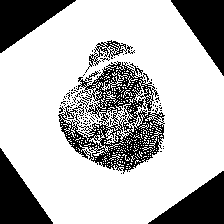

In [6]:
from PIL import Image

apple = Image.open("apple_DataGal.jpg") #kép megnyitása
apple = apple.resize((224,224))         #kép átméretezése
apple = apple.convert('1')              #kép színezése
apple = apple.rotate(35)                #kép forgatása

apple